# HW1 Question 4-6

The probability density func for the cauchy distribution is:

$$
f(x;\theta) \;=\; \frac{1}{\pi\,\bigl[1 + (x - \theta)^2\bigr]}.
$$

The relative log-likelihood is:
$$
\ell(\theta)
= \sum_{i=1}^n \log f(x_i; \theta)
= -\,n \log\pi \;-\; \sum_{i=1}^n \log\bigl[\,1 + (x_i - \theta)^2\bigr].
$$

As $-n\log\pi$ is a constant irrelative to $\theta$，then max $\ell(\theta)$ is same as minimizing the below:
$$
\sum_{i=1}^n \log\bigl[\,1 + (x_i - \theta)^2\bigr].
$$

$$
\text{We let}
\quad
S(\theta)
\;=\;
\frac{d}{d\theta} \,\ell(\theta)
\;=\;
-\sum_{i=1}^{n}
\frac{2\,\bigl(x_i - \theta\bigr)}{1 \;+\; \bigl(x_i - \theta\bigr)^2}.
$$

$$
\text{To find MLE，we need to figure out } S(\theta) \;=\; 0
\;\;\Longleftrightarrow\;\;
\sum_{i=1}^{n} \frac{x_i - \theta}{\,1 + (x_i - \theta)^2\,}
\;=\; 0.
$$

* Question 4(a):

In [21]:
import numpy as np

data = np.array([
    1.77, -0.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29,
    3.71, -2.40, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21
])
n = len(data)
data

array([  1.77,  -0.23,   2.76,   3.8 ,   3.47,  56.75,  -1.34,   4.24,
        -2.44,   3.29,   3.71,  -2.4 ,   4.53,  -0.07,  -1.05, -13.87,
        -2.53,  -1.75,   0.27,  43.21])

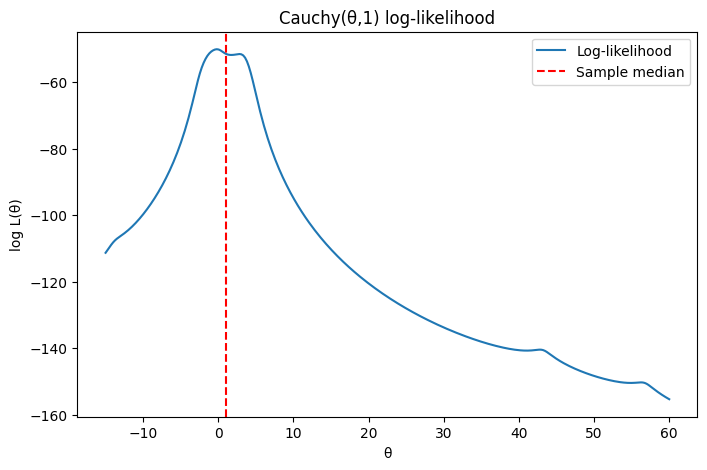

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# log likelihood func
def log_likelihood(theta, x):
    # 常数项 - n*log(pi) 略去也不会影响曲线形状，此处省略。
    return - np.sum(np.log(1.0 + (x - theta)**2))

thetas = np.linspace(-15, 60, 300)
ll_values = [log_likelihood(th, data) for th in thetas]

plt.figure(figsize=(8, 5))
plt.plot(thetas, ll_values, label="Log-likelihood")
plt.axvline(np.median(data), color='r', ls='--', label="Sample median")
plt.title("Cauchy(θ,1) log-likelihood")
plt.xlabel("θ")
plt.ylabel("log L(θ)")
plt.legend()
plt.show()

$$
\text{We let}
\quad
S(\theta)
\;=\;
\sum_{i=1}^{n}
\frac{\bigl(x_i - \theta\bigr)}{1 \;+\; \bigl(x_i - \theta\bigr)^2}.
$$ We only need to find the zero point of S($\theta$)

The Newton's method is:
$$
\theta_{\text{new}} \;=\; \theta_{\text{old}} \;-\;
\frac{S(\theta_{\text{old}})}{S{\prime}(\theta_{\text{old}})},
$$

where
$$
S{\prime}(\theta) \;=\;
\sum_{i=1}^n
\frac{d}{d\theta}\,\biggl(\frac{x_i - \theta}{1 + (x_i - \theta)^2}\biggr)
=\sum_{i=1}^n
\frac{-(1 + (x_i - \theta)^2)\;+\;2\,(x_i - \theta)^2}
{\bigl[1 + (x_i - \theta)^2\bigr]^2}.
$$

For which can be written as:
$$
\sum_{i=1}^n\frac{-1 + (x_i - \theta)^2}{\bigl[1 + (x_i - \theta)^2\bigr]^2}.
$$

In [52]:
def S(theta, x):
    """ i.e. sum( (x_i - theta)/(1 + (x_i - theta)^2 ) ). """
    return np.sum((x - theta) / (1.0 + (x - theta)**2))

def S_prime(theta, x):
    """ S(theta) derivative """
    num = -1.0 + (x - theta)**2
    den = (1.0 + (x - theta)**2)**2
    return np.sum(num / den)

def newton_method(theta0, x, max_iter=100, tol=1e-8):
    theta = theta0
    for i in range(max_iter):
        f = S(theta, x)
        fp = S_prime(theta, x)
        if abs(fp) < 1e-21:
            print(f"导数过小，可能出现数值不稳定，迭代停止。迭代次数={i}")
            break
        theta_new = theta - f/fp
        if abs(theta_new - theta) < tol:
            break
        theta = theta_new
    return theta

# testing for all starting points: 
start_points = [-11, -1, 0, 1.5, 8, 38]
for sp in start_points:
    est = newton_method(sp, data)
    print(f"Newton start at {sp:5}, converged to {est:.4f}")

导数过小，可能出现数值不稳定，迭代停止。迭代次数=35
Newton start at   -11, converged to -215268457525.0355
Newton start at    -1, converged to -0.1923
Newton start at     0, converged to -0.1923
Newton start at   1.5, converged to 1.7136
导数过小，可能出现数值不稳定，迭代停止。迭代次数=35
Newton start at     8, converged to -150101717444.7210
Newton start at    38, converged to 42.7954


From the output we can see that Newton’s method can be highly sensitive to initial guesses for this Cauchy‐likelihood problem. In particular:
* Starting at $\theta_0$ = -11 or 8 causes the algorithm to step into a region where the derivative is very small (hence the warning message) and ultimately leads to an extreme value for the estimate. This suggests instability or overshooting in the iterations—typical of Newton’s method when the Hessian (or first derivative) becomes very close to zero or the step size is not controlled.
* For initial values nearer the (apparent) global maximum (e.g., $\theta_0$ = -1, 0, 1.5), the method converges to more “reasonable” solutions around -0.19 or 1.71. These are presumably local maxima or at least local stationary points close to where the sample median would also suggest an optimum. Given that the dataset contains large outliers (e.g., 56.75 and 43.21), the likelihood can have somewhat complicated curvature in certain regions, which can lead Newton’s method astray if started too far away.
* The outcome of $\theta \approx -1.51$ or $\theta \approx 42.80$ from some starts (like 8 or 38) further illustrates the presence of potential multiple extrema or at least multiple stationary points in the likelihood function (especially with heavy‐tailed Cauchy data that contains severe outliers).

Overall, these results highlight the fact that while Newton’s method converges quickly under ideal conditions, it may fail to converge or converge to less meaningful local solutions if the initial guess is not chosen carefully or if there are outliers causing nearly flat regions in the objective. A more robust approach—like using a line search, bisection, or secant method, or simply starting near the sample median—often avoids these instabilities.

* Question 4(b):

In [60]:
def bisection_method(a, b, x, max_iter=50, tol=1e-6):
    fa = S(a, x)
    fb = S(b, x)
    if fa * fb > 0:
        raise ValueError("初始区间两端函数同号，不能直接使用二分法。")

    for i in range(max_iter):
        m = 0.5*(a + b)
        fm = S(m, x)
        if abs(fm) < tol:
            break
        # 根据符号决定新的区间
        if fa*fm < 0:
            b = m
            fb = fm
        else:
            a = m
            fa = fm
    return 0.5*(a + b)

a0, b0 = -1, 1
try:
    est_bisect = bisection_method(a0, b0, data)
    print(f"Bisection in [{a0},{b0}] --> {est_bisect:.4f}")
except ValueError as e:
    print("二分法失败：", e)

a0, b0 = -2, -1
try:
    est_bisect = bisection_method(a0, b0, data)
    print(f"Bisection in [{a0},{b0}] --> {est_bisect:.4f}")
except ValueError as e:
    print("二分法失败：", e)

Bisection in [-1,1] --> -0.1923
二分法失败： 初始区间两端函数同号，不能直接使用二分法。


* Question 4(c): Secant Method

$$
\theta_{k+1}
= \theta_{k} \;-\;
S(\theta_{k})\;
\frac{\theta_{k} - \theta_{k-1}}{S(\theta_{k}) - S(\theta_{k-1})}.
$$

In [65]:
def secant_method(theta0, theta1, x, max_iter=100, tol=1e-6):
    f0 = S(theta0, x)
    f1 = S(theta1, x)
    for i in range(max_iter):
        if abs(f1 - f0) < 1e-14:
            print("割线法出现分母几乎为零，可能不稳定。")
            return theta1
        # update theta
        theta2 = theta1 - f1 * (theta1 - theta0)/(f1 - f0)

        if abs(theta2 - theta1) < tol:
            return theta2

        # next round
        theta0, theta1 = theta1, theta2
        f0, f1 = f1, S(theta2, x)

    return theta1

# test1: (θ^(0), θ^(1)) = (-2, -1)
theta_hat_1 = secant_method(-2, -1, data)
print(f"Secant from (-2, -1) --> {theta_hat_1:.4f}")

# test2: (θ^(0), θ^(1)) = (-3, 3)
theta_hat_2 = secant_method(-3, 3, data)
print(f"Secant from (-3,  3) --> {theta_hat_2:.4f}")

Secant from (-2, -1) --> -0.1923
Secant from (-3,  3) --> 2.8175


Because the Cauchy likelihood with outliers can have multiple stationary points, the secant method (which does not require bracketing) may converge to any one of them. Starting from $\theta^{(0)}=-3$ and $\theta^{(1)}=3$, it happens to settle at $\theta \approx 2.8175$. This point is simply another stationary solution of $S(\theta)$, rather than the global maximum or the zero we might expect from a better‐chosen initial pair.



* Question 5(a)

$$
f(x;\theta)\;=\;\frac{1-\cos\bigl(x-\theta\bigr)}{2\pi},
\quad x\in[0,2\pi],\;\theta\in[-\pi,\pi].
$$

Because $1-\cos(x-\theta)$ is largest around $x\approx\theta+\pi$, the distribution is effectively “centered” $at \theta+\pi$.  In fact, a short integral check shows that its mean is $\mathbb{E}[X]=\theta+\pi$.

* Method of Moments (MoM):
Matching the sample mean $\bar{X}$ to the theoretical mean $\theta+\pi$ gives

$\hat\theta_{\mathrm{MoM}} \;=\; \bar{X}\;-\;\pi$,

* Log-likelihood:
$$
\ell(\theta)
\;=\;\sum_{i=1}^n \log\bigl[f(x_i;\theta)\bigr]
\;=\;
\sum_{i=1}^n\Bigl\{\log\bigl[1-\cos(x_i-\theta)\bigr]\;-\;\log(2\pi)\Bigr\}.
$$
Ignoring the constant $-n\log(2\pi)$, the derivative is
$$
\frac{d}{d\theta}\,\ell(\theta)
\;=\;
-\sum_{i=1}^n
\frac{\sin\bigl(x_i-\theta\bigr)}{1-\cos\bigl(x_i-\theta\bigr)}.
$$
Setting this to zero and solving numerically yields the MLE.


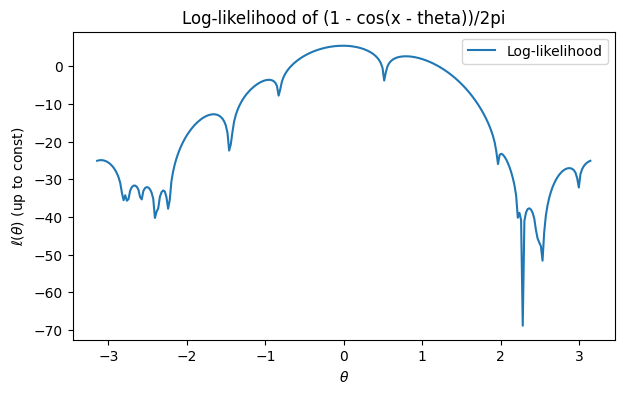

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# (a) Plotting the log-likelihood
# -----------------------------
data = np.array([
    3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96,
    2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50
])
n = len(data)

def loglike(theta, x):
    # ignore constant -n*log(2*pi)
    return np.sum( np.log(1.0 - np.cos(x - theta)) )

thetas = np.linspace(-np.pi, np.pi, 300)
ll_vals = [loglike(th, data) for th in thetas]

plt.figure(figsize=(7,4))
plt.plot(thetas, ll_vals, label='Log-likelihood')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\ell(\theta)$ (up to const)')
plt.title("Log-likelihood of (1 - cos(x - theta))/2pi")
plt.legend()
plt.show()


$$
E[X] \;=\;\int_{0}^{2\pi}x\,f(x;\theta)\,dx
\;=\;
\int_{0}^{2\pi} x\,\frac{1-\cos(x-\theta)}{2\pi}\,dx.
$$
用换元 $z = x - \theta、x=z+\theta$ 并注意 $x\in[0,2\pi]$ 则 $z\in[-\theta,\,2\pi-\theta]$，可得

$$
E[X]
\;=\;\frac{1}{2\pi}\,\int_{z=-\theta}^{\,2\pi-\theta} \bigl(z+\theta\bigr)\bigl[1-\cos z\bigr]\,dz.
$$
将这拆成两部分并逐项积分，可以得到最后结果：
$$
E[X]
\;=\;
\pi \;+\;\sin(\theta).
$$

* Question 5(b)

In [89]:
import numpy as np

mean_data = np.mean(data)
val = mean_data - np.pi   # sin(\theta)

if val < -1 or val > 1:
    print("No real solution for MoM: the sample mean is out of [π-1, π+1].")
    theta_mom = None
else:
    theta_mom = np.arcsin(val)
    # 若需要强行限制在 [-π, π]，可做：
    if theta_mom < -np.pi:
        theta_mom += 2*np.pi
    elif theta_mom > np.pi:
        theta_mom -= 2*np.pi

print("Method-of-Moments estimate:", theta_mom)

Method-of-Moments estimate: 0.05844060614042408


* Question 5(c)

In [91]:

def S(theta, x):
    """Derivative of log-likelihood w.r.t. theta (set =0 for MLE)."""
    return -np.sum( np.sin(x - theta) / (1.0 - np.cos(x - theta)) )

def S_prime(theta, x):
    """2nd derivative of log-likelihood w.r.t. theta (for Newton)."""
    # derivative of - sin(z)/(1 - cos(z)) w.r.t. z => complicated expression
    # We'll do it directly with finite differences or symbolic if we like.
    # For clarity, let's do a straightforward numeric difference approach:
    eps = 1e-8
    return (S(theta+eps, x) - S(theta-eps, x)) / (2*eps)

def newton_method(theta0, x, max_iter=100, tol=1e-7):
    theta = theta0
    for i in range(max_iter):
        f  = S(theta, x)
        fp = S_prime(theta, x)
        if abs(fp)<1e-12:
            break
        theta_new = theta - f/fp
        # keep in [-pi, pi] if we interpret the parameter mod 2pi
        if   theta_new>np.pi:  theta_new -= 2*np.pi
        elif theta_new<-np.pi: theta_new += 2*np.pi

        if abs(theta_new - theta) < tol:
            theta = theta_new
            break
        theta = theta_new

    return theta


In [93]:
# use MoM result from (b) as starting value
theta_hat = newton_method(theta_mom, data)
print(f"MLE from Newton, starting at MoM: {theta_hat:.4f}")

# try the same Newton method from -2.7 and 2.7
theta_hatA = newton_method(-2.7, data)
theta_hatB = newton_method( 2.7, data)

print(f"Newton from -2.7 => {theta_hatA:.4f}")
print(f"Newton from  2.7 => {theta_hatB:.4f}")

MLE from Newton, starting at MoM: -0.0120
Newton from -2.7 => -2.6667
Newton from  2.7 => 2.8731


* Question 6

$$
P(Y=1|X;\beta)\;=\;\frac{1}{1+\exp\bigl[-(\beta_0+\beta_1X_1+\beta_2X_2)\bigr]}.
$$


In [103]:
import pandas as pd
import statsmodels.api as sm

# 1. 从 txt 文件读取
#   如果数据之间是空格/Tab分隔，可以用 sep='\s+'
df = pd.read_csv("/Users/dongwenou/Downloads/Statistical Computing/HW_chapter1_6.txt", header=None, sep=r'\s+')
df.columns = ['Y', 'X1', 'X2']  # 给列命名

# 2. 给设计矩阵添加截距
df['intercept'] = 1.0
X = df[['intercept', 'X1', 'X2']]
y = df['Y']

# 3. 使用 statsmodels 做逻辑回归 (Logit)
logit_model = sm.Logit(y, X)
result = logit_model.fit()  # MLE 拟合
print(result.summary())

# 参数就是 [beta0, beta1, beta2]
print("\nMLE of beta:")
print(result.params)

Optimization terminated successfully.
         Current function value: 0.445592
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.3564
Time:                        10:58:07   Log-Likelihood:                -89.118
converged:                       True   LL-Null:                       -138.47
Covariance Type:            nonrobust   LLR p-value:                 3.691e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1944      0.189      1.031      0.302      -0.175       0.564
X1            -1.2942      0.

In [131]:
import numpy as np

def read_data_txt(filepath):
    """
    从给定 txt 文件读取数据。
    文件每行格式:  Y X1 X2
    """
    data = np.loadtxt(filepath, dtype=float)
    # data[:,0] => Y 列
    # data[:,1] => X1
    # data[:,2] => X2
    Y = data[:, 0]
    X1 = data[:, 1]
    X2 = data[:, 2]
    
    # 构造设计矩阵 X: [1, X1, X2], shape=(n,3)
    n = len(Y)
    intercept = np.ones((n,1))
    X = np.column_stack((intercept, X1, X2))  # shape (n,3)
    return X, Y

def logistic_p(X, beta):
    """
    计算向量化的 p_i = 1 / [1 + exp(-(X beta))]
    X: shape=(n,3)
    beta: shape=(3,) or (3,1)
    返回 shape=(n,)
    """
    z = X.dot(beta)  # (n,)
    return 1.0 / (1.0 + np.exp(-z))

def log_likelihood(X, Y, beta):
    """
    计算对数似然: sum [ y_i*log(p_i) + (1-y_i)*log(1-p_i) ]
    X: (n,3)
    Y: (n,)
    beta: (3,)
    """
    p = logistic_p(X, beta)
    eps = 1e-12  # 防止出现 log(0)
    ll = np.sum(Y*np.log(p+eps) + (1.0-Y)*np.log(1.0-p+eps))
    return ll

def gradient(X, Y, beta):
    """
    计算梯度: X^T (Y - p)
    返回 shape=(3,)
    """
    p = logistic_p(X, beta)   # shape=(n,)
    diff = Y - p              # shape=(n,)
    grad = X.T.dot(diff)      # shape=(3,)
    return grad

def hessian(X, Y, beta):
    """
    计算 Hessian 矩阵: - X^T [p(1-p) I] X
    这里 p(1-p) 需要写成对角矩阵，但可用向量化操作
    返回 shape=(3,3)
    """
    p = logistic_p(X, beta)
    W = p * (1.0 - p)         # shape=(n,)
    # X^T diag(W) X
    # 用广播做法: X^T(W * X行)
    # 先把 X 逐行乘 W => shape (n,3)
    Xw = X * W[:, np.newaxis]
    H = -(X.T.dot(Xw))        # Hessian = -[X^T diag(W) X]
    return H

def newton_raphson_logistic(X, Y, tol=1e-6, max_iter=100):
    """
    用 Newton-Raphson 做逻辑回归 MLE
    返回估计的 beta 以及 每次迭代的对数似然
    """
    n, d = X.shape  # n=样本数, d=3(截距+2变量)
    beta = np.zeros(d)  # 初值，可自行调整
    
    ll_history = []
    for i in range(max_iter):
        # 计算梯度 & Hessian
        g = gradient(X, Y, beta)
        H = hessian(X, Y, beta)
        
        # 更新: beta_new = beta - H^{-1} g
        # 注意要先 invert Hessian(可能需要更稳定的方式)
        try:
            H_inv = np.linalg.inv(H)
        except np.linalg.LinAlgError:
            print("Hessian is singular - stopping.")
            break
        
        beta_new = beta - H_inv.dot(g)
        
        # 计算对数似然看看是否收敛
        ll_new = log_likelihood(X, Y, beta_new)
        ll_history.append(ll_new)
        
        # 判断收敛: 看 beta 的变化 或 看对数似然的变化
        if np.linalg.norm(beta_new - beta) < tol:
            beta = beta_new
            break
        beta = beta_new
    
    return beta, ll_history


if __name__ == "__main__":
    # 文件路径:
    filepath = "/Users/dongwenou/Downloads/Statistical Computing/HW_chapter1_6.txt"
    
    # 1. 读取数据
    X, Y = read_data_txt(filepath)  # X.shape=(n,3), Y.shape=(n,)
    
    # 2. Newton-Raphson 拟合
    beta_est, ll_hist = newton_raphson_logistic(X, Y, tol=1e-7, max_iter=200)
    
    # 3. 输出结果
    print("Estimated beta:", beta_est)
    print("Final log-likelihood:", ll_hist[-1])
    print("Number of iterations:", len(ll_hist))

Estimated beta: [ 0.19442939 -1.29416247  3.55460812]
Final log-likelihood: -89.11835572404411
Number of iterations: 7


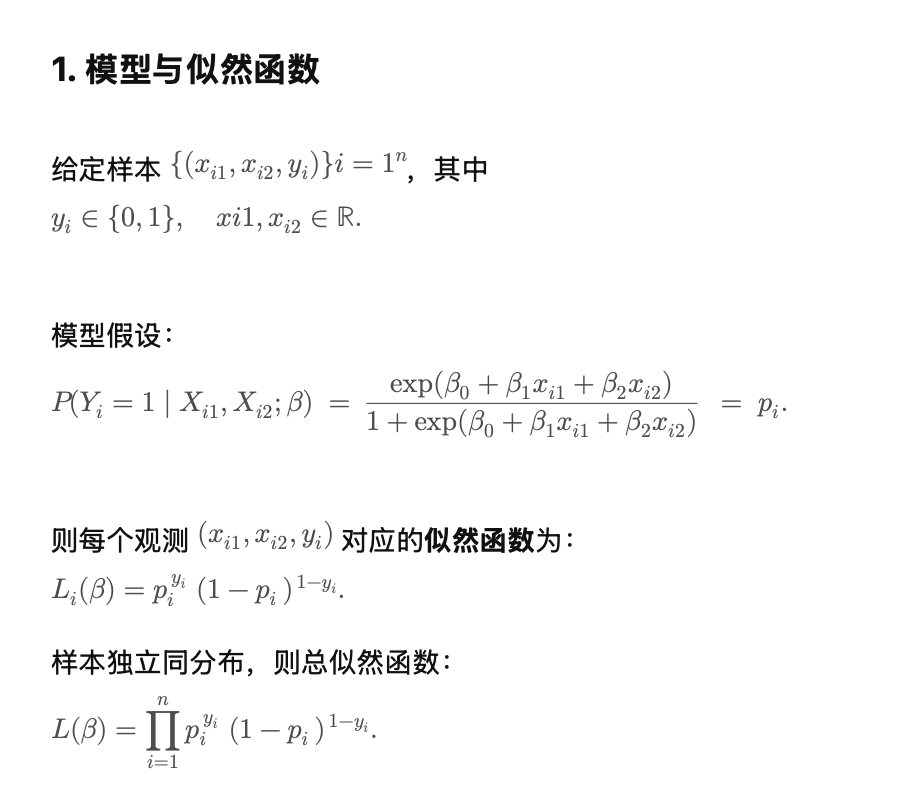

$$
\begin{aligned}
\log f_Y(y;\theta)
&=\;\log \int p(x\mid y;\theta{\prime})\,\frac{f_{X,Y}(x,y;\theta)}{p(x\mid y;\theta{\prime})}\,dx\\[6pt]
&\;\;\;\;\ge\;\int p(x\mid y;\theta{\prime}) \,\log \frac{f_{X,Y}(x,y;\theta)}{p(x\mid y;\theta{\prime})} \,dx\\[3pt]
&=\;\underbrace{\int p(x\mid y;\theta{\prime}) \log f_{X,Y}(x,y;\theta)\,dx}{Q(\theta,\theta{\prime})}
\;-\;\underbrace{\int p(x\mid y;\theta{\prime}) \log p(x\mid y;\theta{\prime})\,dx}{H(\theta{\prime},\theta{\prime})}.
\end{aligned}
$$


$$
B \;\succeq\; \nabla^2 g(\theta)
\quad (\text{等价于 } B - \nabla^2 g(\theta) \text{ 是半正定})
\quad\forall\,\theta,
$$

2. 选取负定矩阵 B
若要最大化 g(\theta)，则希望构造一个对 g 的下界函数。此时若能找到一个负定(negative definite)矩阵 B，满足

$$
B \;\preceq\; \nabla^2 g(\theta)
\quad (\text{等价于 } B - \nabla^2 g(\theta) \text{ 是半负定})
\quad\forall\,\theta,
$$

即可用 B 来“替换”或“下包”\nabla^2 g(\theta)。